In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Practice\\LinearRegression\\Linear-Regression'

In [3]:
files = os.listdir()
print(files)

['.conda', '.git', 'avik.ipynb', 'deliveries.csv', 'IPL Kaggle Practice', 'IPL_Kaggle_v01.ipynb', 'Kaggle_Walmart_junk_01.ipynb', 'matches.csv']


In [4]:
# display all columns of dataset while printing head 
pd.set_option("display.max_columns", None)

In [5]:
test = pd.read_csv("matches.csv")

In [6]:
test1 = pd.read_csv("deliveries.csv")

In [7]:
# merge both data set on common column (match id ) 
combined_df =  (pd.merge(test, test1, left_on='id', right_on='match_id', how='left').drop('match_id', axis=1))


In [8]:
new_combineddf = combined_df

In [9]:
#new column mentioning if the batter was player of the match 
new_combineddf['player'] = new_combineddf['player_of_match'] == new_combineddf['batter']


In [10]:
 
new_combineddf['date'] = pd.to_datetime(new_combineddf['date'])

In [11]:
# Split date into month and year 
new_combineddf['year'], new_combineddf['month'] = new_combineddf['date'].dt.year, new_combineddf['date'].dt.month

In [12]:
new_combineddf.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder', 'player', 'year',
       'month'],
      dtype='object')

In [13]:
slim_rawdata = new_combineddf.drop(['season','date','result','umpire1','umpire2','non_striker','fielder','venue'], axis=1)

In [14]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from datetime import datetime, date, timedelta
from sklearn.model_selection import train_test_split

In [15]:
#making a new column based on some conditions on existing column 
conditions = [
    slim_rawdata['total_runs'] == 0,
    (slim_rawdata['total_runs'] >= 1) & (slim_rawdata['total_runs'] <= 3),
    slim_rawdata['total_runs'] > 4
]

categories = ['no', 'yes', 'boundery']

In [16]:
slim_rawdata['Category'] = np.select(conditions, categories, default='Unknown')

In [17]:
conditions = [
    slim_rawdata['total_runs'] == 0,
  
    slim_rawdata['total_runs'] > 0
]

categories = [0, 1]

In [18]:
slim_rawdata['run(y/n)'] = np.select(conditions, categories, default='Unknown').astype(float)

In [19]:
# making a new data frame with only columns containing numbers
num_rawdata = slim_rawdata.select_dtypes(include=[np.number])

In [20]:
num_rawdata.columns

Index(['id', 'result_margin', 'target_runs', 'target_overs', 'inning', 'over',
       'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket', 'year',
       'month', 'run(y/n)'],
      dtype='object')

In [21]:
# checking missing values
missing = num_rawdata.isnull().sum()
print(missing)

id                  0
result_margin    4124
target_runs       309
target_overs      309
inning              0
over                0
ball                0
batsman_runs        0
extra_runs          0
total_runs          0
is_wicket           0
year                0
month               0
run(y/n)            0
dtype: int64


In [22]:
# filling missing value with mean 
num_rawdata.fillna(num_rawdata.mean(), inplace=True)

print(num_rawdata.mean())
print(num_rawdata.std())


id               907066.506086
result_margin        17.279451
target_runs         167.290406
target_overs         19.846742
inning                1.483531
over                  9.197677
ball                  3.624486
batsman_runs          1.265001
extra_runs            0.067806
total_runs            1.332807
is_wicket             0.049632
year               2016.161007
month                 4.827208
run(y/n)              0.653388
dtype: float64
id               367991.278255
result_margin        21.428924
target_runs          32.146891
target_overs          1.223541
inning                0.502643
over                  5.683484
ball                  1.814920
batsman_runs          1.639298
extra_runs            0.343265
total_runs            1.626416
is_wicket             0.217184
year                  4.951596
month                 1.619753
run(y/n)              0.475892
dtype: float64


In [23]:
num_rawdata.head(2)

,id,result_margin,target_runs,target_overs,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,year,month,run(y/n)
0,335982,140.0,223.0,20.0,1,0,1,0,1,1,0,2008,4,1.0
1,335982,140.0,223.0,20.0,1,0,2,0,0,0,0,2008,4,0.0


In [24]:
X = num_rawdata[['result_margin','target_runs','ball']]
y = num_rawdata['run(y/n)']

In [25]:
model = LogisticRegression()


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [27]:
logreg = model.fit(X_train, y_train)


In [28]:
logreg.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [29]:
logreg.predict_proba(X_test)

array([[0.37356816, 0.62643184],
       [0.38879317, 0.61120683],
       [0.37062747, 0.62937253],
       ...,
       [0.34003962, 0.65996038],
       [0.35244853, 0.64755147],
       [0.34185143, 0.65814857]])

In [30]:
# checking roc curve 
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

In [31]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 


In [33]:
roc_auc = auc(fpr, tpr)

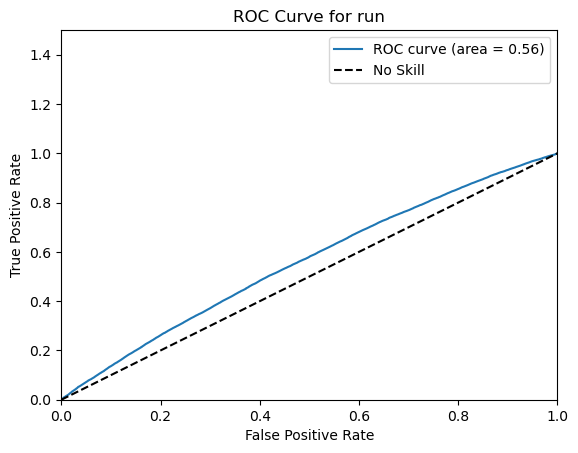

In [34]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for run')
plt.legend()
plt.show()

### using another method for model 

In [35]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
clf = LogisticRegression(penalty = 'l2', C = 1)


In [37]:
clf.fit(X_train,y_train)


LogisticRegression(C=1)

In [38]:
pred = clf.predict(X_test)
print (f'Training Accuracy - : {clf.score(X_train,y_train)}')
print (f'Testing Accuracy - : {clf.score(X_test,y_test)}')

Training Accuracy - : 0.6523685420818641
Testing Accuracy - : 0.652230568756707


In [39]:
cm_with_C_1 = confusion_matrix(pred, y_test)


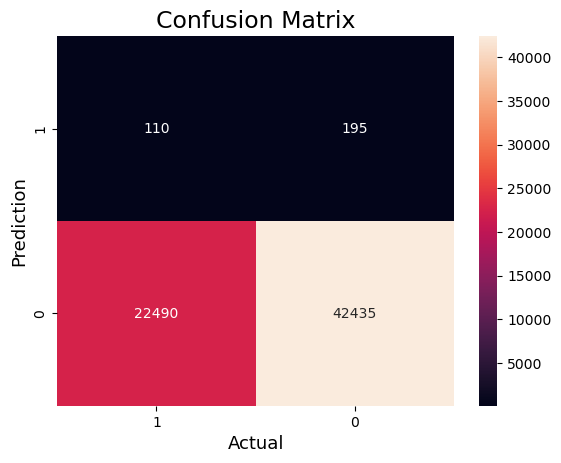

In [67]:
# confusion matrix 
import seaborn as sns

sns.heatmap(cm_with_C_1,
            annot=True,
            fmt='g',
            xticklabels=['1', '0'],  # metastatic = 1, benign = 0
            yticklabels=['1', '0'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
# tp = true positive , fp = false positive, fn = false negative , tn = true negative
tp = cm_with_C_1[0][0]
fp = cm_with_C_1[0][1]
fn = cm_with_C_1[1][0]
tn = cm_with_C_1[1][1]


In [ ]:
# accuracy = proportion of correct predictions,precision =  correctly predict the positive class
accuracy = (tp + tn) / np.sum(cm_with_C_1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.652230568756707
Precision: 0.36065573770491804
Recall: 0.0048672566371681415
F1 Score: 0.009604889762060686


In [43]:
# Using Brute Force Method to identify best value for  C
 
c = np.arange(10,25,0.25)
train_acc = []
test_acc = []
for i in c:
    clf = LogisticRegression(penalty = 'l2', C = i)
    
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    train_acc.append(clf.score(X_train,y_train))
    test_acc.append(accuracy_score(pred, y_test))

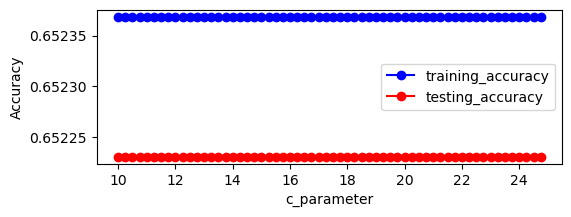

The minimum difference in training and testing scores is at C =  10.0


In [68]:
# lot for accuracy of training and testing data 
plt.figure(figsize=(6,2))
plt.plot(c,train_acc, marker = 'o', color = 'b',label='training_accuracy')      
plt.plot(c,test_acc, marker = 'o', color = 'r',label='testing_accuracy')
plt.xlabel('c_parameter')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

diff = np.array(train_acc) - np.array(test_acc)
min_idx = np.argmin(diff)
print("The minimum difference in training and testing scores is at C = ",c[min_idx])

In [45]:
youden_index = tpr - fpr



In [46]:
# Find the index of the maximum Youden's Index
best_index = np.argmax(youden_index)



In [47]:
# Get the optimal threshold
optimal_threshold = thresholds[best_index]

# Print the optimal threshold
print("Optimal cutoff threshold (Youden's Index):", optimal_threshold)

Optimal cutoff threshold (Youden's Index): 0.6573574320415148


In [48]:
from sklearn.metrics import f1_score

# Calculate F1 score for each threshold
f1_scores = [f1_score(y_test, y_pred_proba > t) for t in thresholds]



In [49]:
# Find the index of the maximum F1 score
best_f1_index = np.argmax(f1_scores)


In [50]:
# Get the optimal threshold for F1 score
optimal_f1_threshold = thresholds[best_f1_index]

print("Optimal threshold for F1 score:", optimal_f1_threshold)

Optimal threshold for F1 score: 0.4662791739762409


Another method to find cut off value 

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

cutoff_values = np.arange(0.0, 1.0, 0.01)


In [54]:
y_probs = model.predict_proba(X_test)[:, 1]

In [55]:
# Define the range of possible cutoffs
cutoffs = np.arange(0.0, 1.0, 0.01)
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []

In [60]:
# Loop through each cutoff and calculate performance metrics
for cutoff in cutoffs:
    y_pred = (y_probs >= cutoff).astype(int)  # classify based on the cutoff
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    auc_scores.append(roc_auc_score(y_test, y_probs))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

In [61]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
best_cutoff_index = np.argmax(f1_scores)  # or use another metric like auc_scores
best_cutoff = cutoffs[best_cutoff_index]
best_f1 = f1_scores[best_cutoff_index]

# Print best cutoff and its F1-score
print(f"Best cutoff: {best_cutoff:.2f}")
print(f"Best F1-score: {best_f1:.4f}")

Best cutoff: 0.00
Best F1-score: 0.7905


In [66]:
accuracies

[0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501609689,
 0.6535336501

In [62]:
f1_scores

[0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266456517,
 0.7904691266

In [70]:
# FIND BEST F1 SCORE
best_cutoff = 0
best_f1 = 0  # Variable to store the best F1 score
for cutoff in cutoff_values:
    # Convert probabilities to binary predictions based on the cutoff
    y_pred = (y_pred_proba >= cutoff).astype(int)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred)
    
    # Track the best cutoff value based on F1 score
    if f1 > best_f1:
        best_f1 = f1
        best_cutoff = cutoff

In [53]:
print(f"Best cutoff: {best_cutoff:.2f}")
print(f"Best F1 score: {best_f1:.4f}")

Best cutoff: 0.00
Best F1 score: 0.7905
